## **EXPLORATORY DATA ANALYSYS (EDA)**

- This dataset contains information about the database of a bank, which needs to know which customers are best suited to sell its financial products to.

- An analysis is needed to determine which customers are interested in purchasing a certificate of deposit with the bank.

- The objective is to find those customers with the **highest conversion potential**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- "age": age (numerical)

- "job": type of job (categorical)

- "marital": marital status (categorical: "married", "divorced", "single")

- "education": level of education (categorical: "unknown", "secondary", "primary", "tertiary")

- "default": whether it defaulted on its obligations (categorical: "yes", "no")

- "balance sheet': average annual balance in euro (numeric)

- "housing": whether or not you have a mortgage loan (categorical: "yes", "no")

- "loan": does it have consumer credit (categorical: "yes", "no")

- "contact": means by which you were contacted (categorical: "unknown", "telephone", "cellular")

- "day": last day of the month in which you were contacted (numeric)

- "month": last month in which it was contacted (categorical: "jan", "feb", "mar", ..., "nov", "dec")

- "duration": duration (in seconds) of the last contact (numeric)

- "campaign": total number of times it was contacted during the campaign (numeric)

- "pdays": number of days after being contacted prior to the current campaign (numeric. -1 indicates no previous contact)

- "previous": number of times you have been contacted before this campaign (numeric)

- "poutcome": outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

- "y": category did the customer subscribe to a term deposit (categorical: "yes", "no")

## **Data Cleaning**

In [2]:
df = pd.read_csv('data/dataset_banco.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [3]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45215.000000,45213,45214,45214,45215,45213.000000,45215,45215,45215,45215.000000,45215,45214.000000,45215.000000,45214.000000,45215.000000,45215,45215
unique,NaN,18,6,10,2,NaN,2,6,5,NaN,12,NaN,NaN,NaN,NaN,6,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9731,27215,23197,44399,NaN,25132,37962,29285,NaN,13768,NaN,NaN,NaN,NaN,36958,39925
mean,41.004711,NaN,NaN,NaN,NaN,1374.159866,NaN,NaN,NaN,15.805839,NaN,258.074357,2.763729,40.192485,0.580383,NaN,NaN
std,12.036647,NaN,NaN,NaN,NaN,3924.255525,NaN,NaN,NaN,8.322473,NaN,257.605175,3.097910,100.120622,2.303438,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,-1389.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum()

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

In the columns job, marital, education, balance, duration, pdays, there are missing data.

I will eliminate the null values because they are a very insignificant number.

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### **Irrlevant Columns** are those that do not contain information relevant to the problem we want to solve

In [7]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no


In [8]:
categorical_level = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

for columns in categorical_level:
 print(f'Column {columns}: {df[columns].nunique()} sublevels')

Column job: 18 sublevels
Column marital: 6 sublevels
Column education: 10 sublevels
Column default: 2 sublevels
Column housing: 2 sublevels
Column loan: 6 sublevels
Column contact: 5 sublevels
Column month: 12 sublevels
Column poutcome: 6 sublevels
Column y: 2 sublevels


No categorical columns are deleted

In [9]:
numeric_level = ['age', 'balance', 'day', 'duration', 'campaign',
       'pdays', 'previous']

for columns in numeric_level:
 print(f'Column {columns}: {df[columns].nunique()} sublevels')

Column age: 85 sublevels
Column balance: 7168 sublevels
Column day: 31 sublevels
Column duration: 1573 sublevels
Column campaign: 48 sublevels
Column pdays: 559 sublevels
Column previous: 41 sublevels


No numeric columns are deleted

#### **Duplicates**

In [10]:
print('before drop duplicates', df.shape)
df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

before drop duplicates (45207, 17)
after drop duplicates (45203, 17)


#### **Outliers**

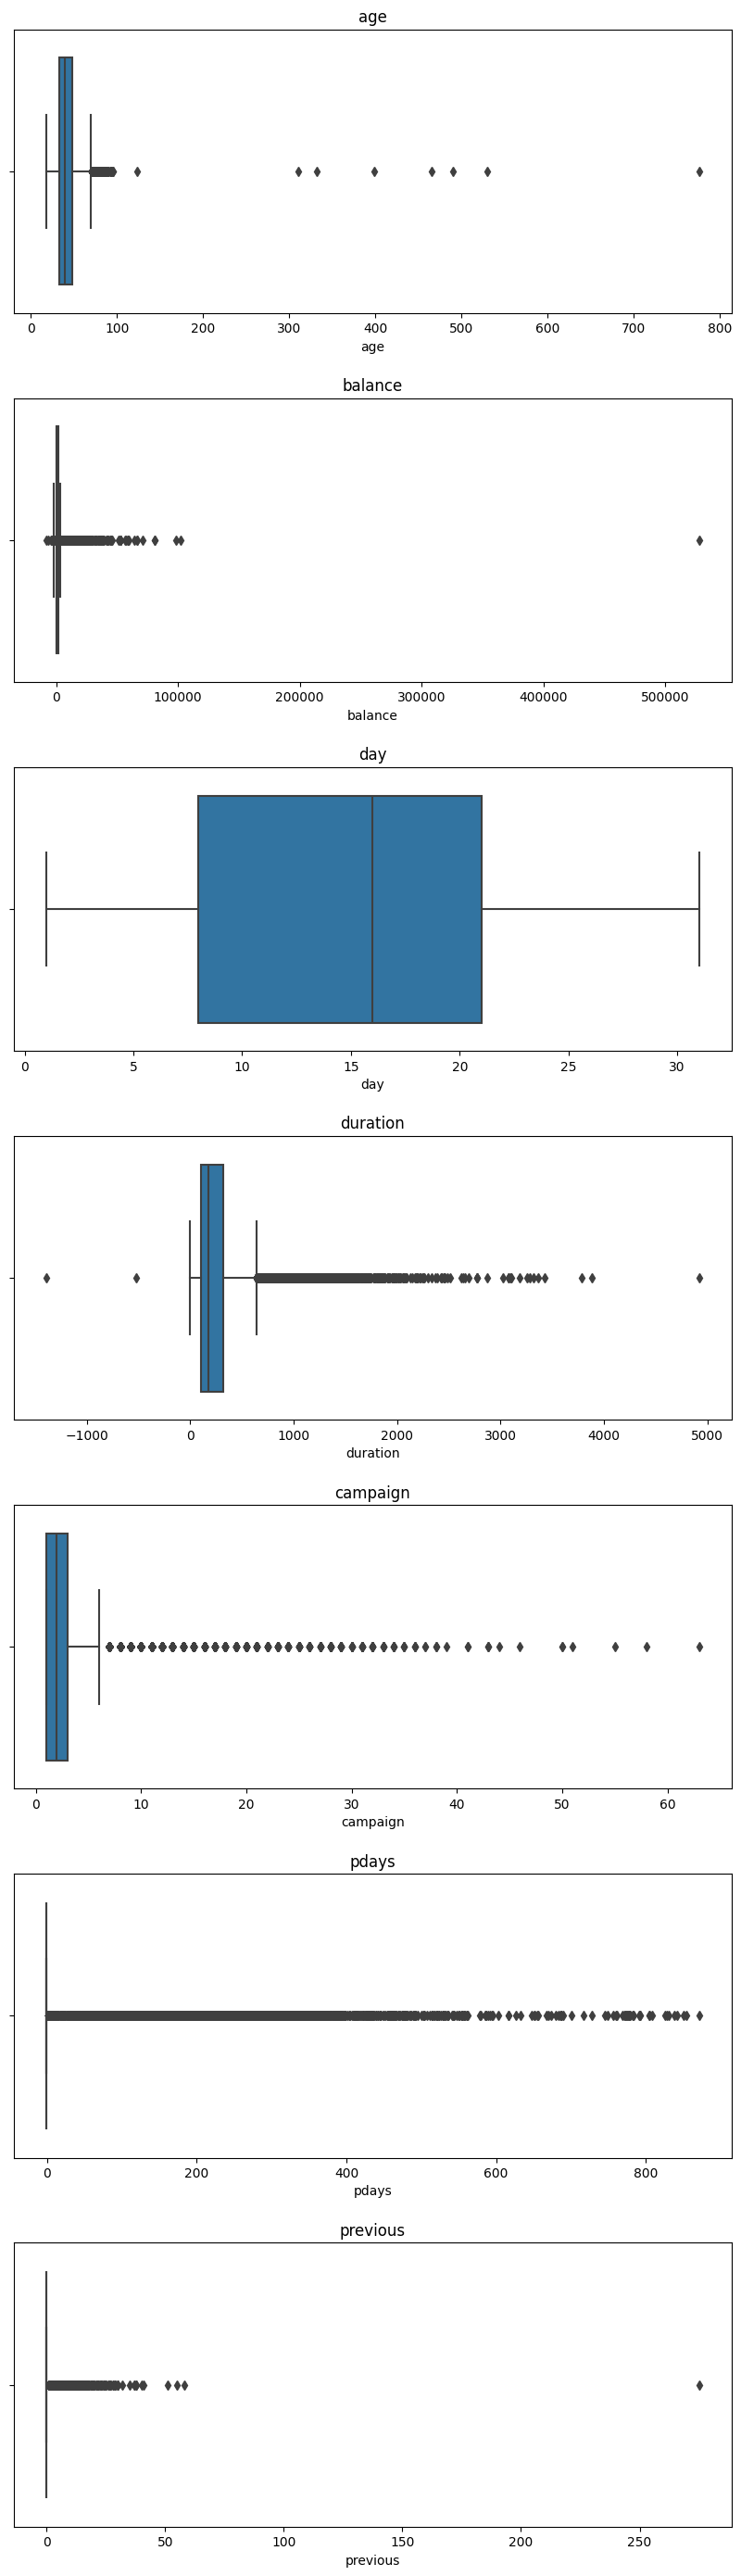

In [11]:
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,35))
fig.subplots_adjust(hspace=0.3)

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=column, data=df, ax=ax[i]) #i-th axis in the set of subgraphs
    ax[i].set_title(column)

- "age": ages over 100 years old
- "duration": negative values
- "previous": extremely high value

In [12]:
print('before drop outliers', df.shape)
df = df[df['age']<=100]
print('after drop outliers', df.shape)

before drop outliers (45203, 17)
after drop outliers (45195, 17)


In [13]:
print('before drop outliers', df.shape)
df = df[df['duration']>0]
print('after drop outliers', df.shape)

before drop outliers (45195, 17)
after drop outliers (45190, 17)


In [14]:
print('before drop outliers', df.shape)
df = df[df['previous']<=90]
print('after drop outliers', df.shape)

before drop outliers (45190, 17)
after drop outliers (45189, 17)


#### **Typographical errors in categorical variables**

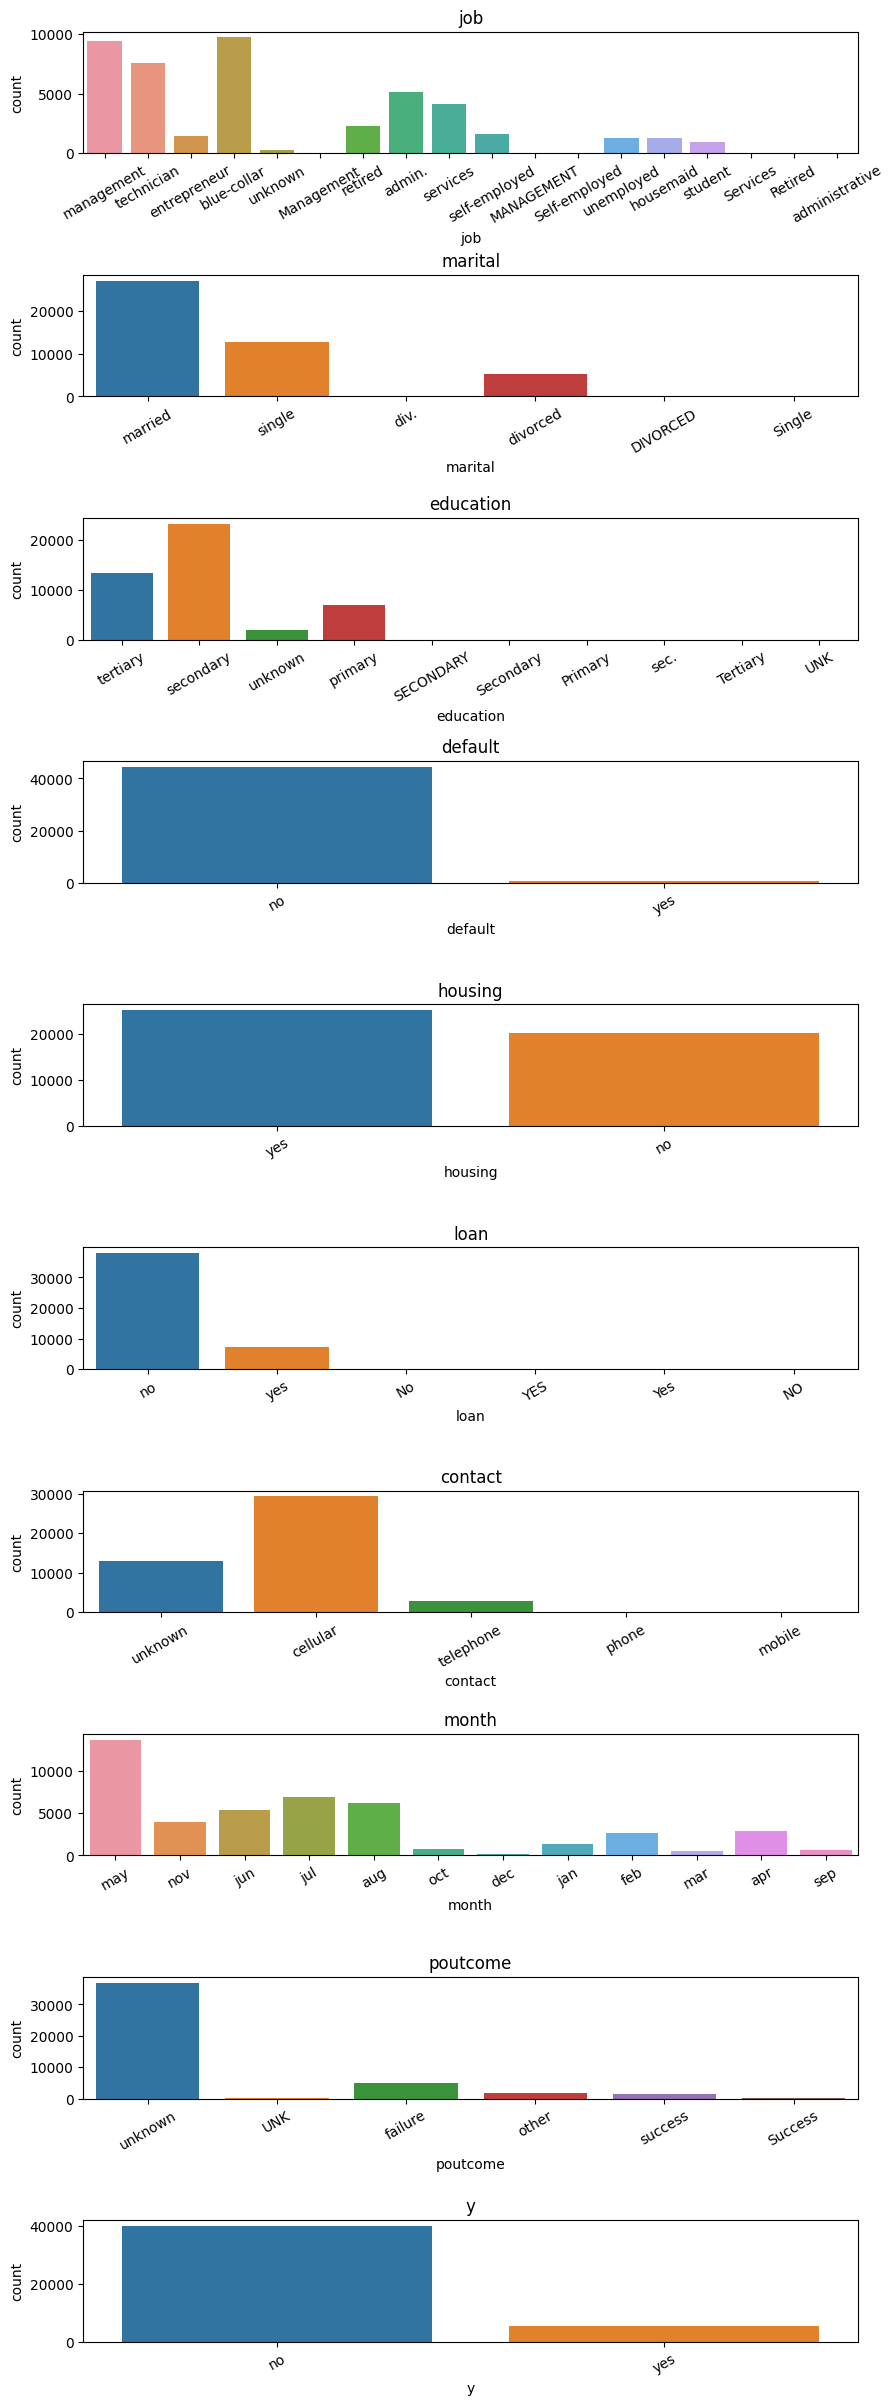

In [15]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, column in enumerate(categorical_columns):
  sns.countplot(x=column, data=df, ax=ax[i])
  ax[i].set_title(column)
  ax[i].set_xticks(ax[i].get_xticks())
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

- JOB

In [16]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'Management', 'retired', 'admin.', 'services',
       'self-employed', 'MANAGEMENT', 'Self-employed', 'unemployed',
       'housemaid', 'student', 'Services', 'Retired', 'administrative'],
      dtype=object)

In [17]:
df.job = df.job.str.lower()
df.job = df.job.str.replace('admin.','administrative', regex=False)

In [18]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'administrative', 'services',
       'self-employed', 'unemployed', 'housemaid', 'student'],
      dtype=object)

- MARITAL

In [19]:
df.marital.unique()

array(['married', 'single', 'div.', 'divorced', 'DIVORCED', 'Single'],
      dtype=object)

In [20]:
conditions = [
    df.marital.str.lower().str.contains("marr"),
    df.marital.str.lower().str.contains("sin"),
    df.marital.str.lower().str.contains("div")
]

options = ["married", "single", "divorced"]

df["marital"] = np.select(conditions, options, "other")

In [21]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

- EDUCATION

In [22]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary', 'SECONDARY',
       'Secondary', 'Primary', 'sec.', 'Tertiary', 'UNK'], dtype=object)

In [23]:
conditions = [
    df.education.str.lower().str.contains("prim"),
    df.education.str.lower().str.contains("secondary"),
    df.education.str.lower().str.contains("tert"),
    df.education.str.lower().str.contains("unk")
]

options = ["primary", "secondary", "tertiary", "unknown"]

df["education"] = np.select(conditions, options, "other")

In [24]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary', 'other'],
      dtype=object)

In [25]:
print(len(df))
df = df[df['education'] != "other"]
print(len(df))

45189
45187


- DEFAULT, HOUSING, LOAN, Y

In [26]:
boolean_variables_list = ["default", "housing", "loan", "y"]

def boolean_column(df, columns):
    for column in columns:
        df[column] = np.where(df[column].str.lower().str.contains("yes"), "yes", "no")

df.pipe(boolean_column, boolean_variables_list) #Apply chainable functions that expect Series or DataFrames.

- CONTACT

In [27]:
df["contact"].value_counts()

contact
cellular     29271
unknown      13009
telephone     2901
phone            3
mobile           3
Name: count, dtype: int64

In [28]:
df.drop(columns="contact", inplace=True)

- MONTH

In [29]:
map_month = {"jan": 1,
               "feb": 2,
               "mar": 3,
               "apr": 4,
               "may": 5,
               "jun": 6,
               "jul": 7,
               "aug": 8,
               "sep": 9,
               "oct": 10,
               "nov": 11,
               "dec": 12}

df.month = df.month.map(map_month)

- POUTCOME

In [30]:
df.poutcome.unique()

array(['unknown', 'UNK', 'failure', 'other', 'success', 'Success'],
      dtype=object)

In [31]:
conditions = [
    df.poutcome.str.lower().str.contains("unk"),
    df.poutcome.str.lower().str.contains("failure"),
    df.poutcome.str.lower().str.contains("success"),
    df.poutcome.str.lower().str.contains("other")
]

options = ["unknown", "failure", "success", "other"]

df["poutcome"] = np.select(conditions, options, "other")

In [32]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

#### **Change the type**

In [33]:
df.select_dtypes(float).columns.tolist()

['balance', 'duration', 'pdays']

In [34]:
df = df.astype({"balance": int,
                "duration": int,
                "pdays": int})

## **Ready For Exploratory Data Analysis**

It is good practice to group continuous variables together as it facilitates analysis, making it easier to visualise and understand patterns and trends in the data

In [35]:
age_categories = ['Very Low Age', 'Low Age', 'Moderate Age', 'High Age', 'Very High Age']

balance_categories = ['Very Low Balance', 'Low Balance', 'Moderate Balance', 'Large Balance', 'Very Large Balance']

df['age_quintile'] = pd.qcut(df['age'], 5, age_categories)
df['balance_quintile'] = pd.qcut(df['balance'], 5, balance_categories)

In [36]:
df[['age','age_quintile', 'balance', 'balance_quintile']].head()

,age,age_quintile,balance,balance_quintile
0,58,Very High Age,2143,Very Large Balance
1,44,High Age,29,Low Balance
2,33,Low Age,2,Very Low Balance
3,47,High Age,1506,Large Balance
4,33,Low Age,1,Very Low Balance


In [37]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,age_quintile,balance_quintile
0,58,management,married,tertiary,no,2143,yes,no,5,5,261,1,-1,0,unknown,no,Very High Age,Very Large Balance


- Relative Columns

In [38]:
columns = ["age", "job", "marital", "education", "default", "balance", "housing", "loan", "poutcome", "y", "age_quintile", "balance_quintile"]
df = df[columns].copy()

#### **First each variable is analysed individually**

In [39]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,poutcome,y,age_quintile,balance_quintile
0,58,management,married,tertiary,no,2143,yes,no,unknown,no,Very High Age,Very Large Balance


In [40]:
df.describe()

,age,balance
count,45187.000000,45187.000000
mean,40.936597,1374.061013
std,10.618687,3924.449615
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


In [41]:
qualitative = ["job", "marital", "education", "default", "housing", "loan", "poutcome", "y"]
quantitative = ["age", "balance"]

In [42]:
from funpymodeling.exploratory import freq_tbl
from funpymodeling.exploratory import profiling_num

- Qualitative Columns

In [43]:
freq_tbl(df[qualitative])

               job  frequency  percentage  cumulative_perc
0      blue-collar       9727    0.215261         0.215261
1       management       9455    0.209242         0.424503
2       technician       7590    0.167969         0.592471
3   administrative       5168    0.114369         0.706840
4         services       4152    0.091885         0.798725
5          retired       2263    0.050081         0.848806
6    self-employed       1578    0.034922         0.883728
7     entrepreneur       1486    0.032886         0.916613
8       unemployed       1303    0.028836         0.945449
9        housemaid       1240    0.027442         0.972890
10         student        937    0.020736         0.993626
11         unknown        288    0.006374         1.000000

----------------------------------------------------------------

    marital  frequency  percentage  cumulative_perc
0   married      27199    0.601921         0.601921
1    single      12785    0.282935         0.884856
2  divorce

- Quantitative Columns

In [44]:
profiling_num(df)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,age,40.936597,10.618687,0.259393,23.0,27.0,33.0,39.0,48.0,59.0,71.0
1,balance,1374.061013,3924.449615,2.856096,-627.0,-172.0,72.0,448.0,1428.0,5769.0,13186.0


--> AGE

/opt/conda/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '')

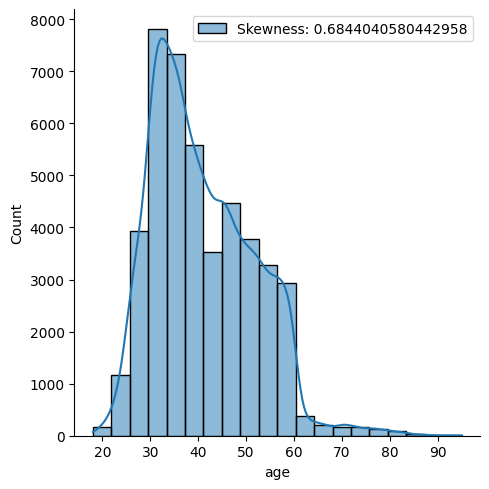

In [45]:
sns.displot(df['age'], bins=20, label = f'Skewness: {df["age"].skew()}', kde=True)
plt.legend(loc = 'best')
plt.title('')

At first glance it does not follow a normal distribution because the data are not uniformly distributed around the central value. The values do not do not cluster around the mean and values do not become progressively less common as they move away from that midpoint.

In [46]:
from scipy.stats import kstest

stat, p_value = kstest(df['age'], 'norm')

print(f'Kolmogorov-Smirnov statistic: {stat:.4f}')
print(f'p-value: {p_value:.4f} \n')

alpha = 0.05
if p_value > alpha:
    print('HO --> normal distribution is accepted')
else:
    print('HO is rejected and H1 is accepted --> non-normal distribution')

Kolmogorov-Smirnov statistic: 1.0000
p-value: 0.0000 

HO is rejected and H1 is accepted --> non-normal distribution


--> BALANCE

/opt/conda/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '')

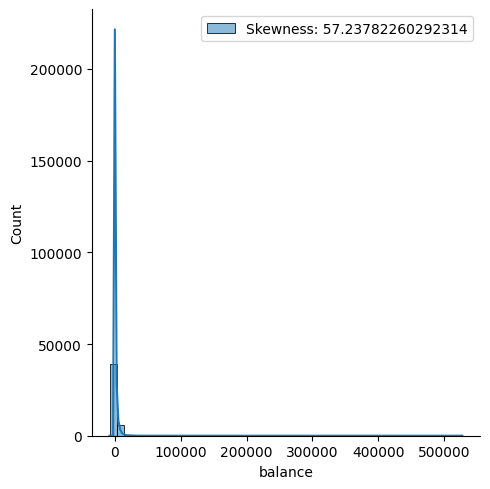

In [47]:
sns.displot(df['balance'], bins=50, label = f'Skewness: {df["balance"].skew()}', kde=True)
plt.legend(loc = 'best')
plt.title('')

In [48]:
from scipy.stats import kstest

stat, p_value = kstest(df['balance'], 'norm')

print(f'Kolmogorov-Smirnov statistic: {stat:.4f}')
print(f'p-value: {p_value:.4f} \n')

alpha = 0.05
if p_value > alpha:
    print('HO --> normal distribution is accepted')
else:
    print('HO is rejected and H1 is accepted --> non-normal distribution')

Kolmogorov-Smirnov statistic: 0.8298
p-value: 0.0000 

HO is rejected and H1 is accepted --> non-normal distribution


**Insights**:

-- In Age and Balance there is no normal distribution

-- Most customers
- work
- are married
- have secondary education
- have not defaulted
- have a mortgage
- do not have a loan
- are between 30 and 50 years old
- have negative balances or balances that do not exceed 1428 euros

#### **Univariate Analysis**

Analyse whether there is any relationship between the possible predictor variables ('age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan') and the variable to be predicted ('y').

- Quantitative Columns

In [49]:
map_y = {'yes': 1 ,'no': 0}
df['y_mapped'] = df['y'].map(map_y)

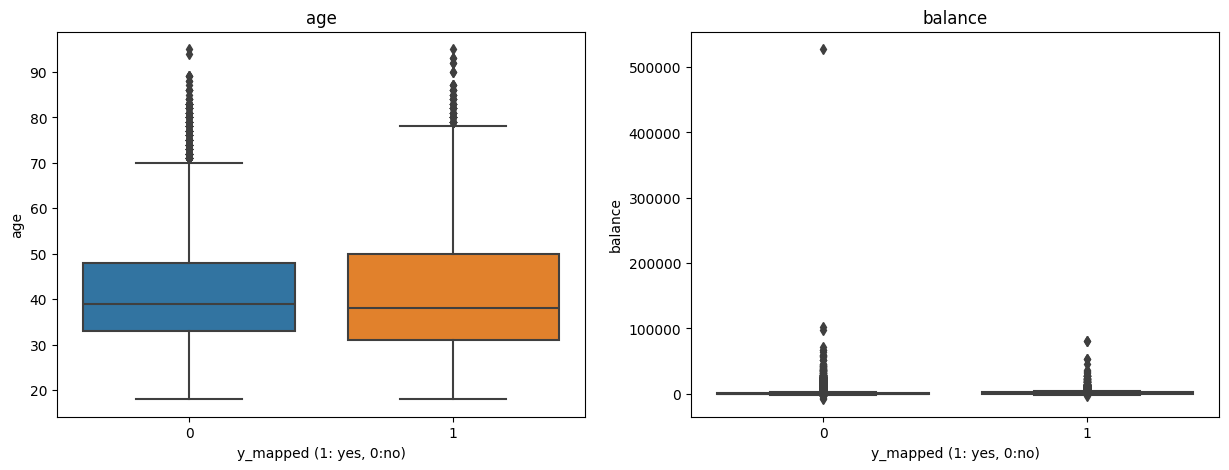

In [50]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

for i, col in enumerate(quantitative):
  bplt = sns.boxplot(x="y_mapped", y=col, data=df, ax=ax[i])
  ax[i].set_xlabel('y_mapped (1: yes, 0:no)')
  ax[i].set_title(col)

Neither in 'age' nor in 'balance' are differences observed between people who did and did not purchase the product.

**Conclusion:** At first sight, numerical variables are not predictive variables.

In [51]:
def plot_rate_conversion(var_predictor, var_predict, type='line', order=None):
    x, y = var_predictor, var_predict

    # generate groupings (groupby), calculate conversion rate (mean),
    # multiply by 100 (mul(100))
    group = df.groupby(x)[y].mean().mul(100).rename('rate_conv').reset_index()

    # And generate three types of graphs
    if type=='line': # Useful for continuous ranges
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictor, y='rate_conv', data=group)
        plt.grid()
    elif type=='bar': # Useful if data are divided into ranges or are categorical
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictor, y='rate_conv', data=group, order=order)
        plt.grid()
    elif type=='scatter': # Useful if the data is divided into ranges or is categorical
        plt.figure(figsize=(10,6)) 
        sns.scatterplot(x=var_predictor, y='rate_conv', data=group)
        plt.grid()

/opt/conda/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


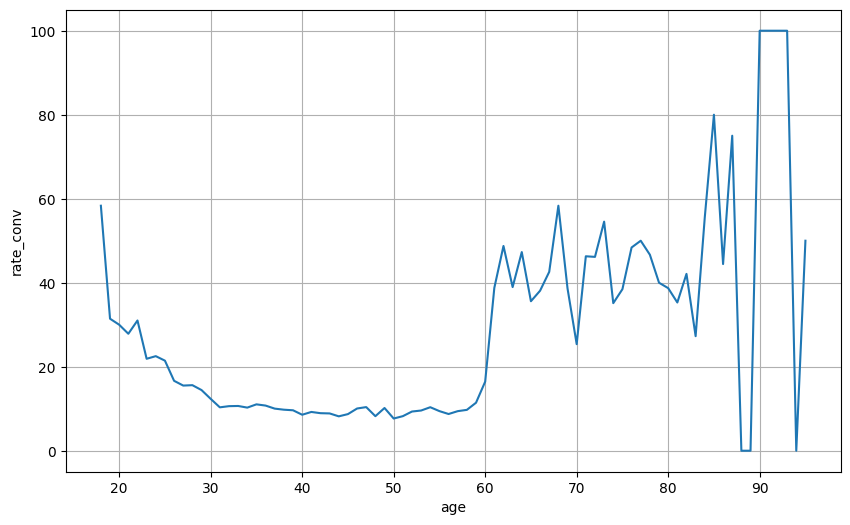

In [52]:
plot_rate_conversion('age','y_mapped', type='line')

In this case, **patterns in conversion rates by age are observed.**

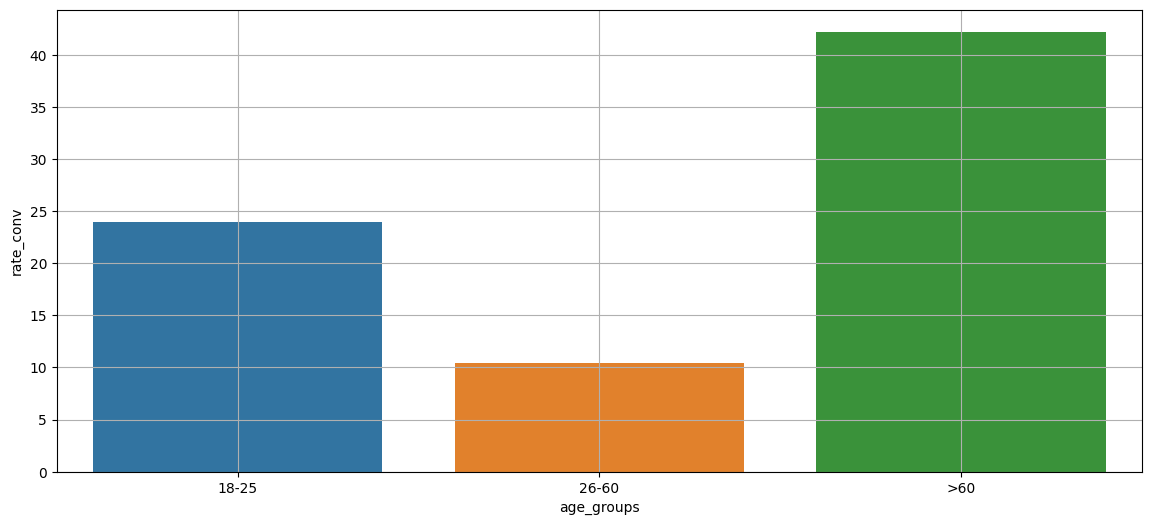

In [53]:
df.loc[:,'age_groups'] = "18-25" #adds a new column and sets all its values as the string "18-25"
df.loc[df['age']>60,'age_groups'] = ">60" #update the values in 'age_groups' for those rows where the value in the 'age' column is greater than 60
df.loc[(df['age']>25)&(df['age']<=60), 'age_groups'] = "26-60"


plot_rate_conversion('age_groups','y_mapped',type='bar')

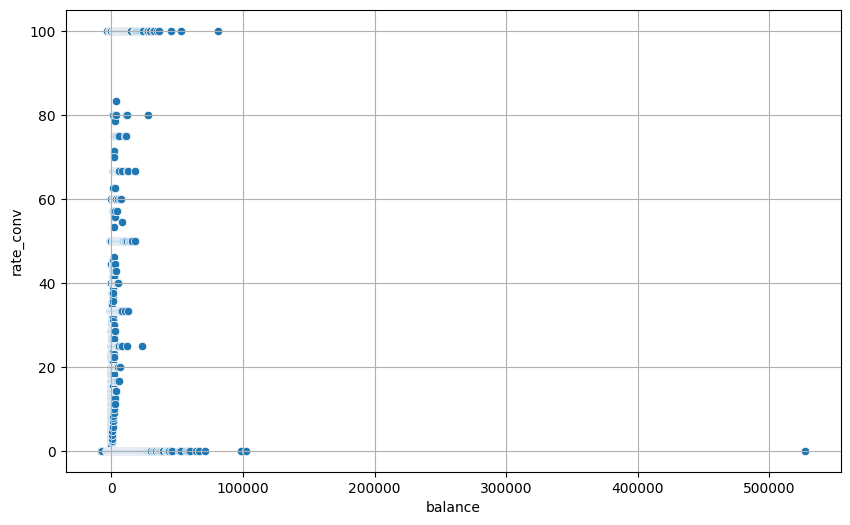

In [54]:
plot_rate_conversion('balance','y_mapped',type='scatter')

In [55]:
df.loc[:,'balance_groups'] = "<0"
df.loc[(df['balance']>=0) & (df['balance']<4000),'balance_groups'] = "0-4K"
df.loc[(df['balance']>=4000) & (df['balance']<8000),'balance_groups'] = "4K-8K"
df.loc[(df['balance']>=8000) & (df['balance']<12000),'balance_groups'] = "8K-12K"
df.loc[(df['balance']>=12000) & (df['balance']<16000),'balance_groups'] = "12K-16K"
df.loc[(df['balance']>=16000) & (df['balance']<20000),'balance_groups'] = "16K-20K"
df.loc[df['balance']>=20000,'balance_groups'] = ">20K"

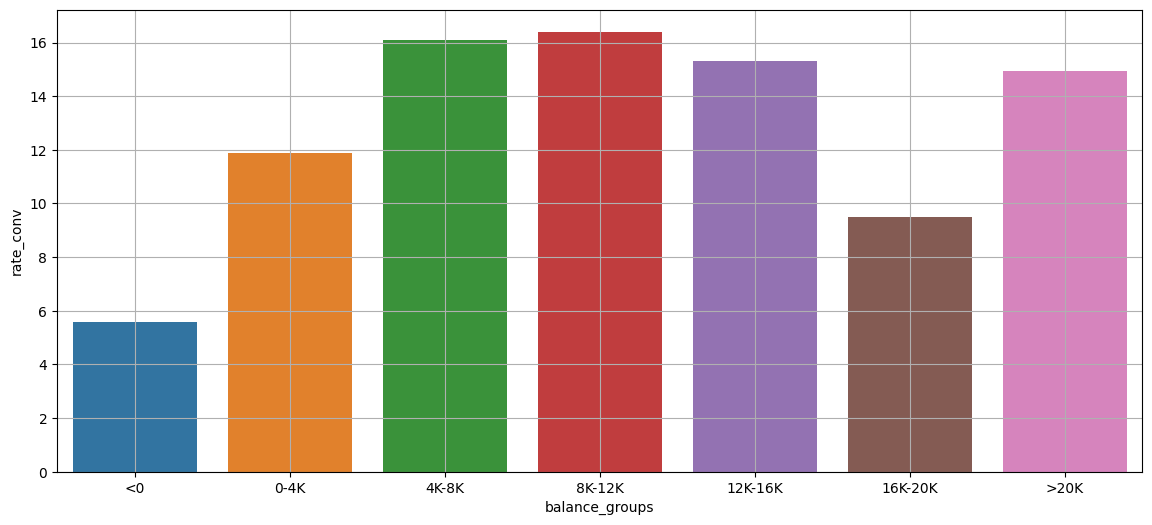

In [56]:
order = ['<0', '0-4K', '4K-8K', '8K-12K', '12K-16K', '16K-20K', '>20K']
plot_rate_conversion('balance_groups','y_mapped',type='bar', order=order)

There are 4 ranges of interest:

- 0-4K
- 4K-16K
- 16K-20K
- Greater than 20K

In [57]:
df.loc[:,'balance_groups'] = "<0"
df.loc[(df['balance']>=0) & (df['balance']<4000),'balance_groups'] = "0-4K"
df.loc[(df['balance']>=4000) & (df['balance']<16000),'balance_groups'] = "4K-16K"
df.loc[(df['balance']>=16000) & (df['balance']<20000),'balance_groups'] = "16K-20K"
df.loc[df['balance']>=20000,'balance_groups'] = ">20K"

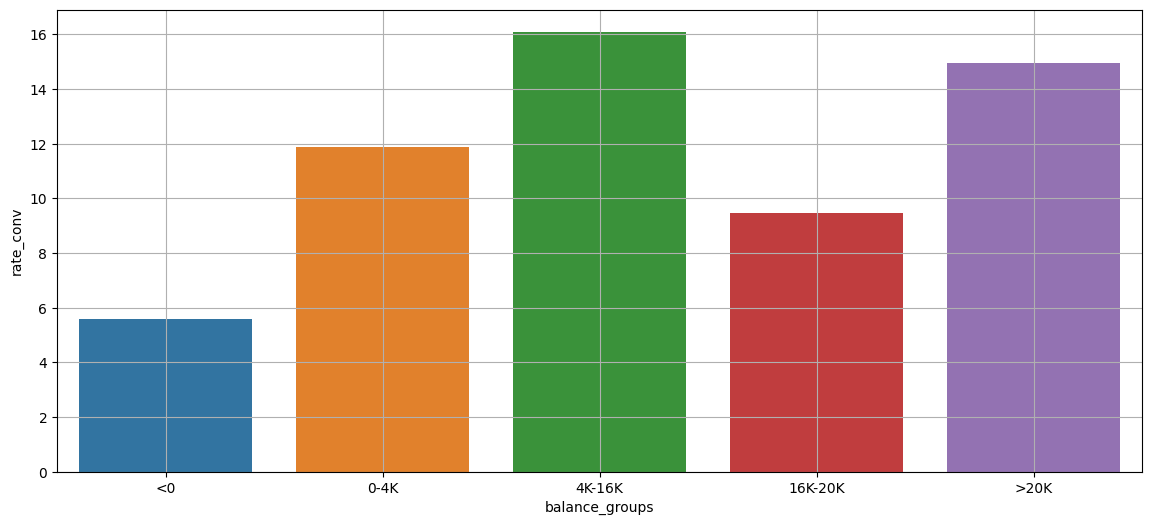

In [58]:
order = ['<0', '0-4K', '4K-16K', '16K-20K', '>20K']
plot_rate_conversion('balance_groups','y_mapped',type='bar', order=order)

- Qualitative Colummns

In [59]:
qualitative

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

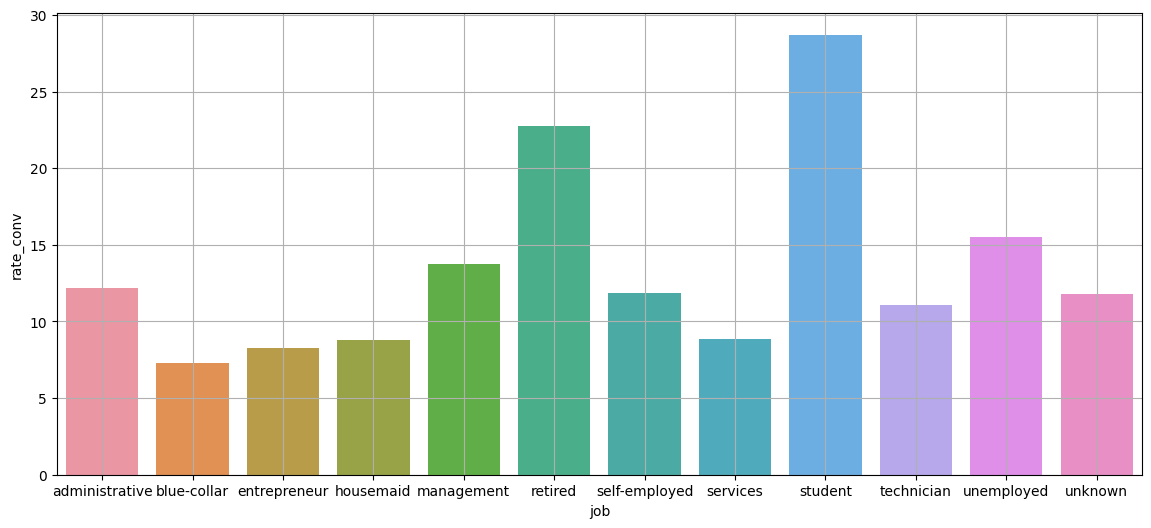

In [60]:
plot_rate_conversion('job','y_mapped',type='bar')

Retired customers and student customers have the highest conversion rates

Job could be a predictor variable

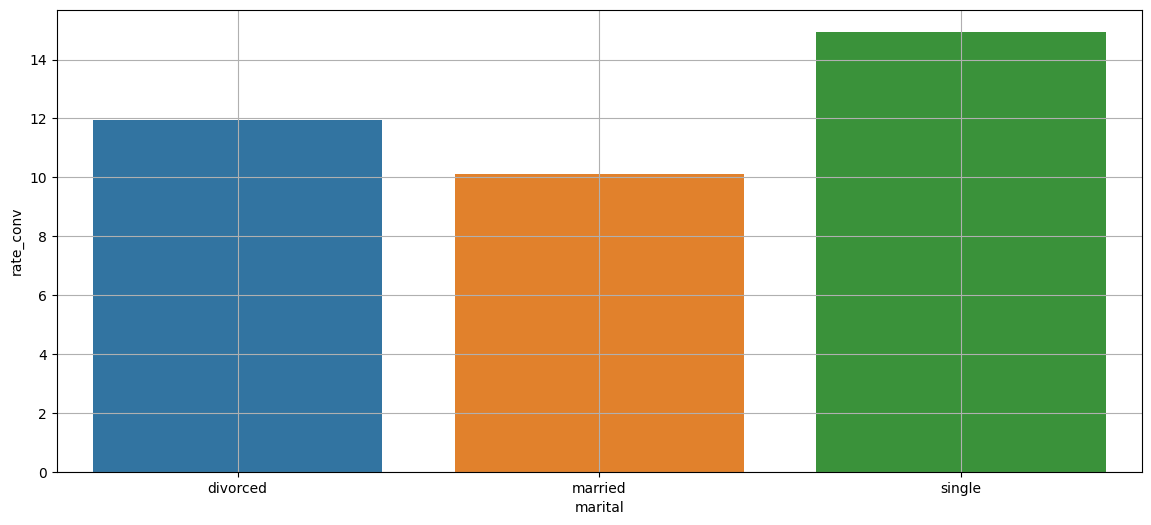

In [61]:
plot_rate_conversion('marital','y_mapped',type='bar')

Conversion rates are very similar for the different levels

Marital appears not to be a predictor variable

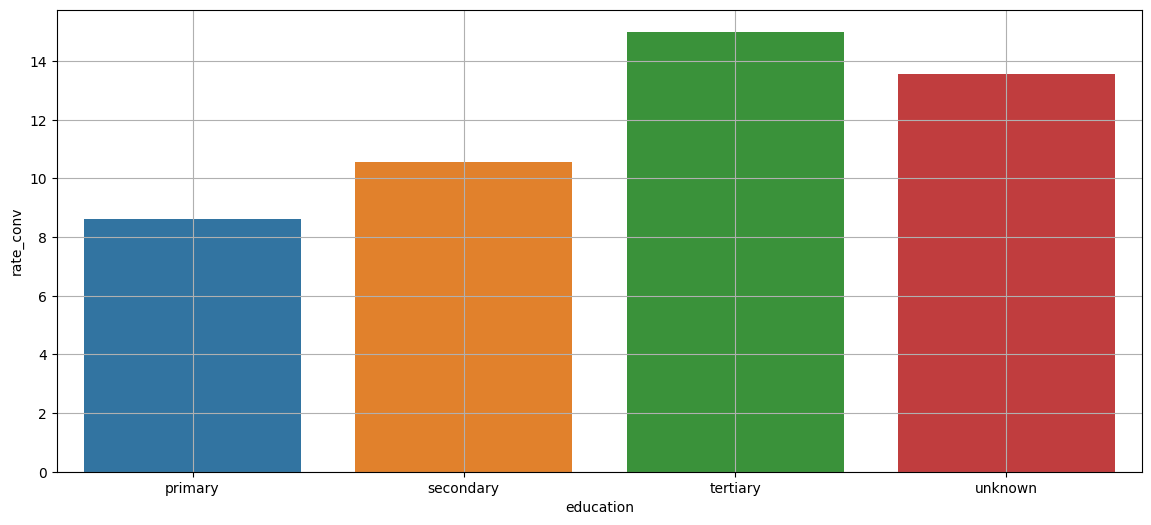

In [62]:
plot_rate_conversion('education','y_mapped',type='bar')

The conversion rate increases as the level of education increases

Education could be a predictor variable

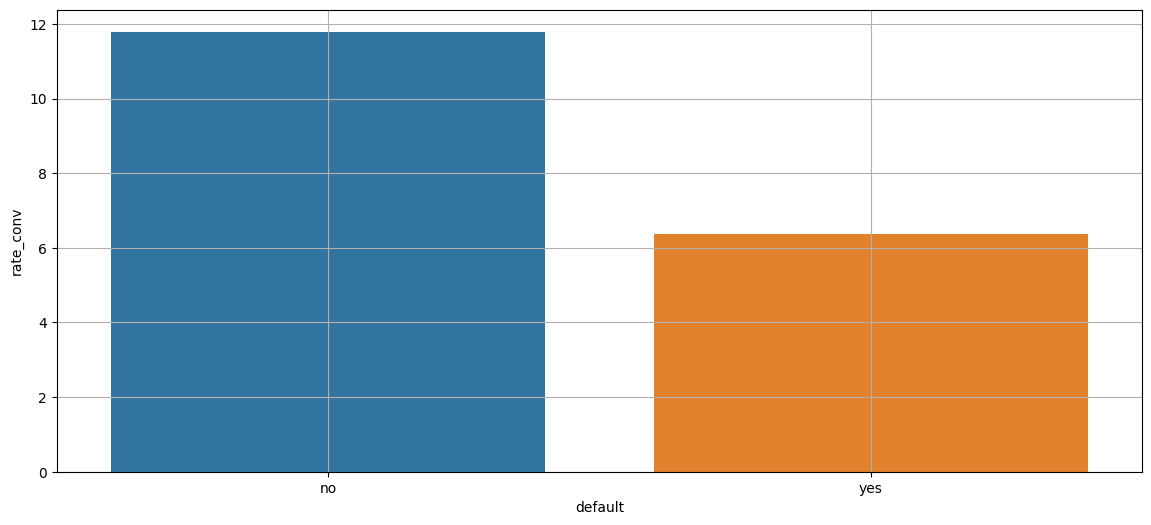

In [63]:
plot_rate_conversion('default','y_mapped',type='bar')

Default is clearly a predictor variable

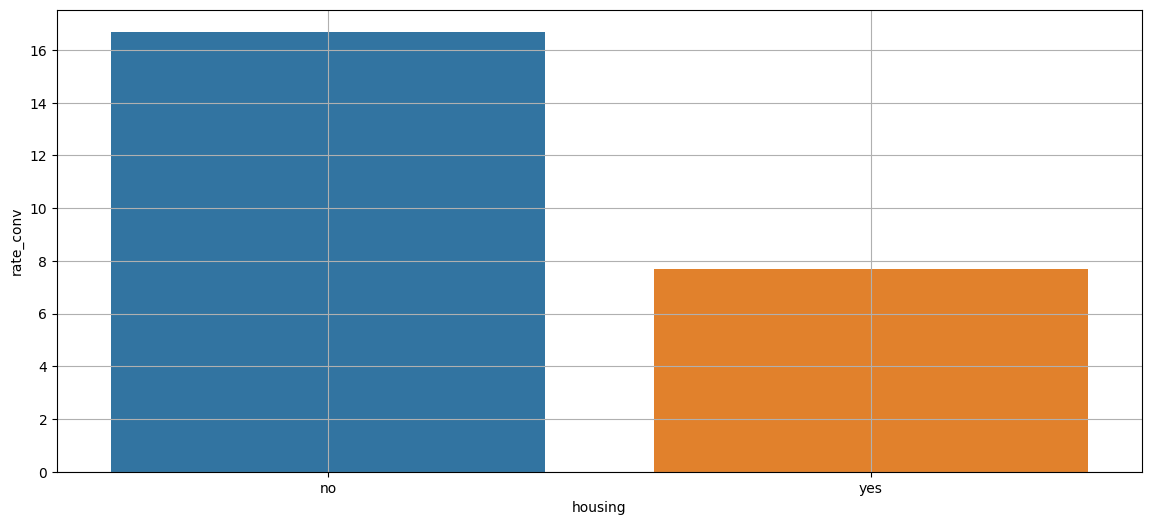

In [64]:
plot_rate_conversion('housing','y_mapped',type='bar')

Housing is clearly a predictor variable

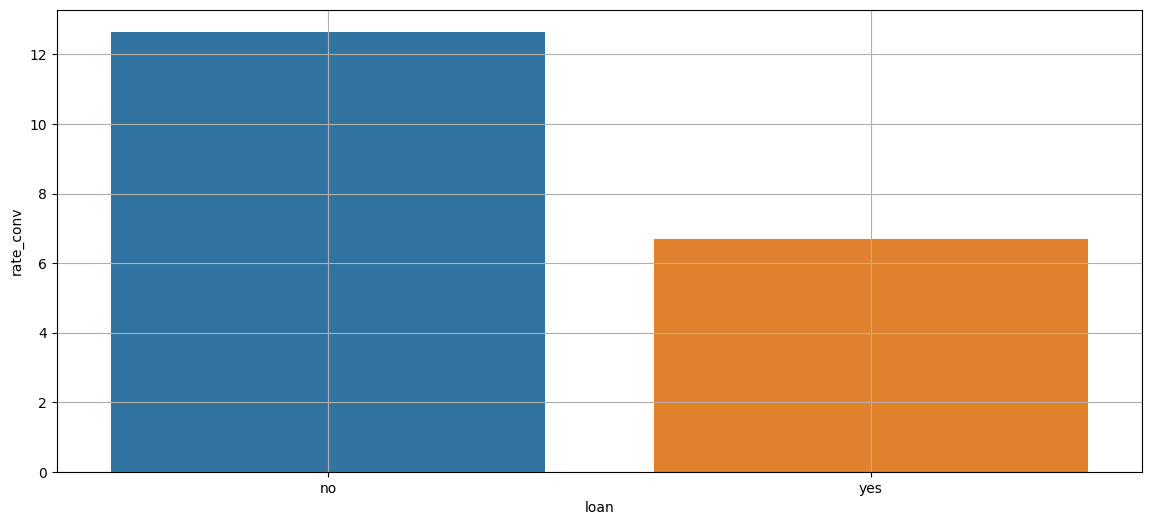

In [65]:
plot_rate_conversion('loan','y_mapped',type='bar')

Loan is clearly a predictor variable

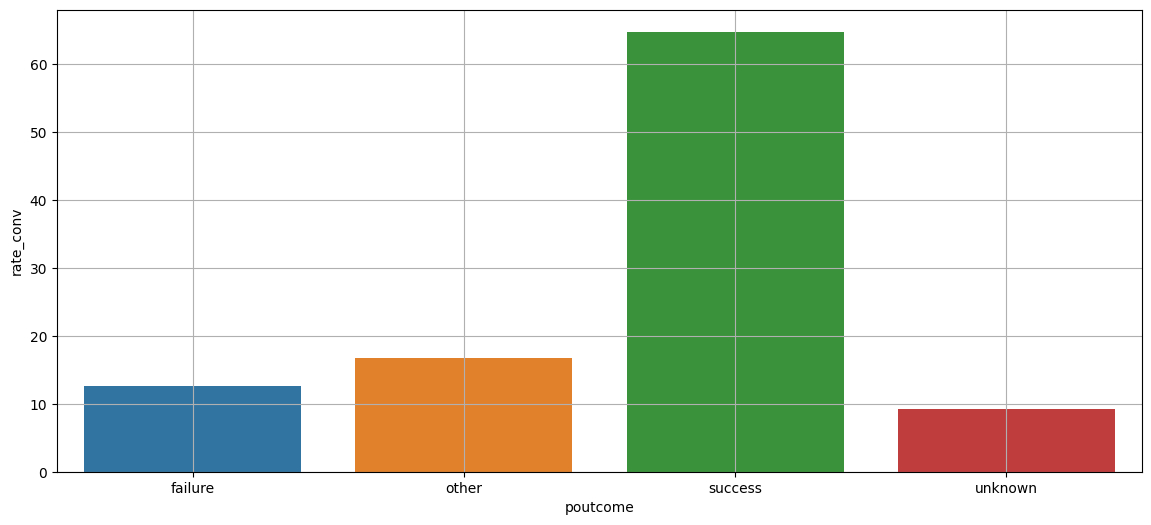

In [66]:
plot_rate_conversion('poutcome','y_mapped',type='bar')

Customers who bought a product in the previous campaign are the most likely to buy another one

Poutcome is clearly a predictor variable

- The predictor variables with the greatest impact on the conversion rate by importance are:

-- job - poutcome

-- age_groups - balance_groups

-- default, housing, loan, education

#### **Bivariate Analysis**

Consists of analysing possible interactions between pairs of predictor variables and their impact on the variable to be predicted.

In [67]:
def plot_tc_bivariate(variable_pairs, order=None):
  cr = df.groupby(variable_pairs)['y_mapped'].mean().to_frame().reset_index() #cr=conversion rate

  #Graph
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=cr['y_mapped'], y=cr[variable_pairs[0]], hue=cr[variable_pairs[1]], order=order)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Conversion rate for {variable_pairs[0]} and {variable_pairs[1]}')
  plt.xlabel('Conversion rate (%)')
  plt.xlim((0,1))

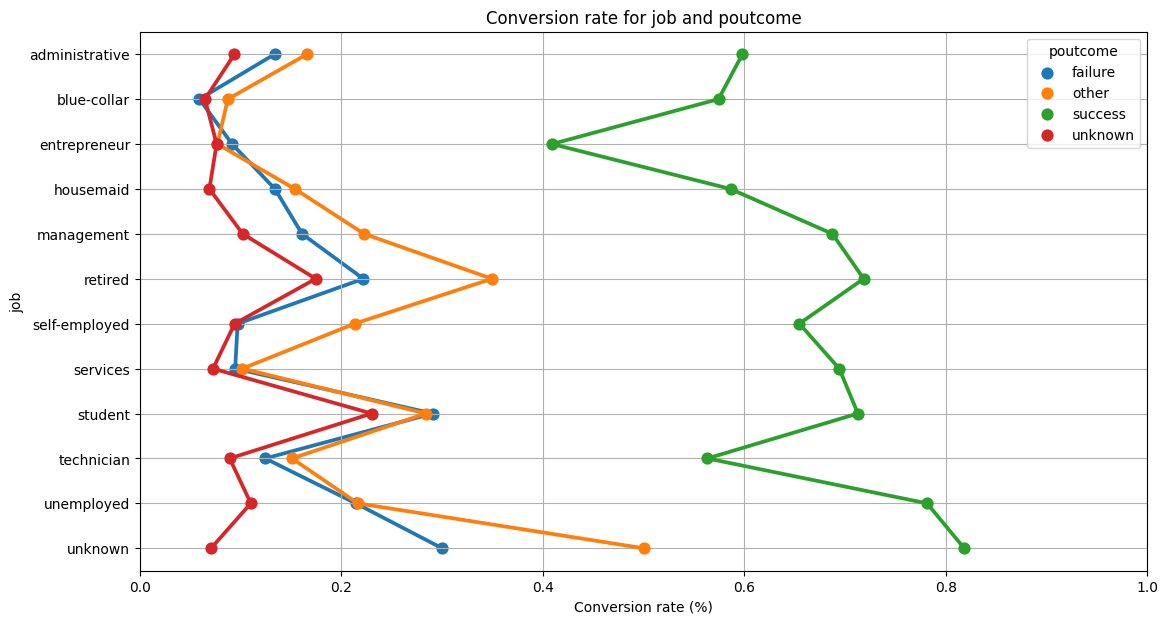

In [68]:
plot_tc_bivariate(['job','poutcome'])

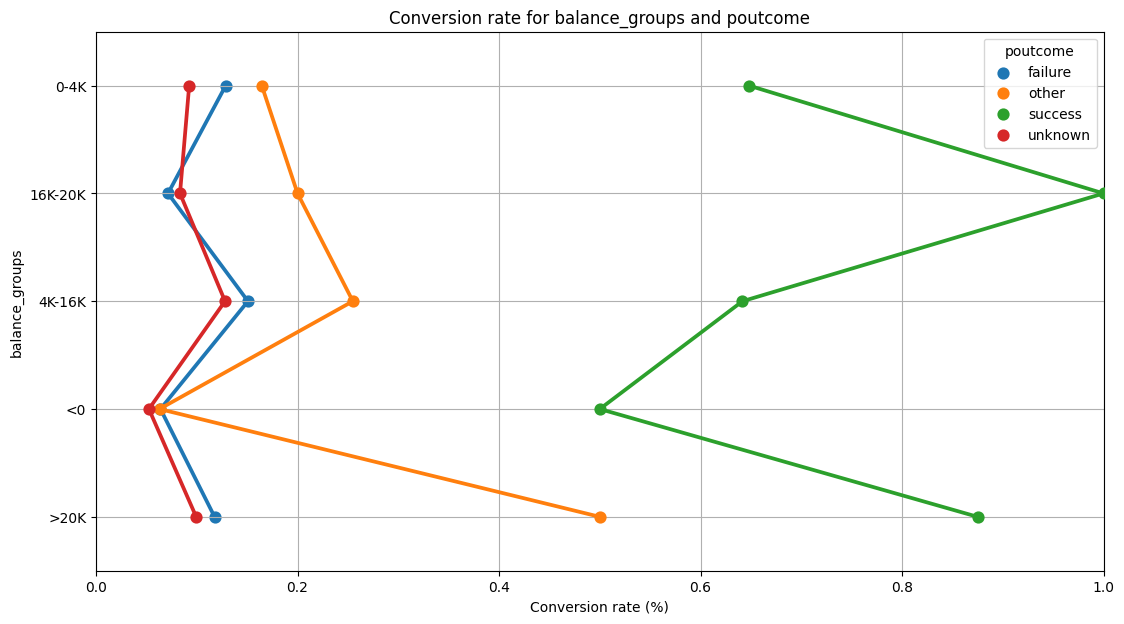

In [69]:
plot_tc_bivariate(['balance_groups','poutcome'])

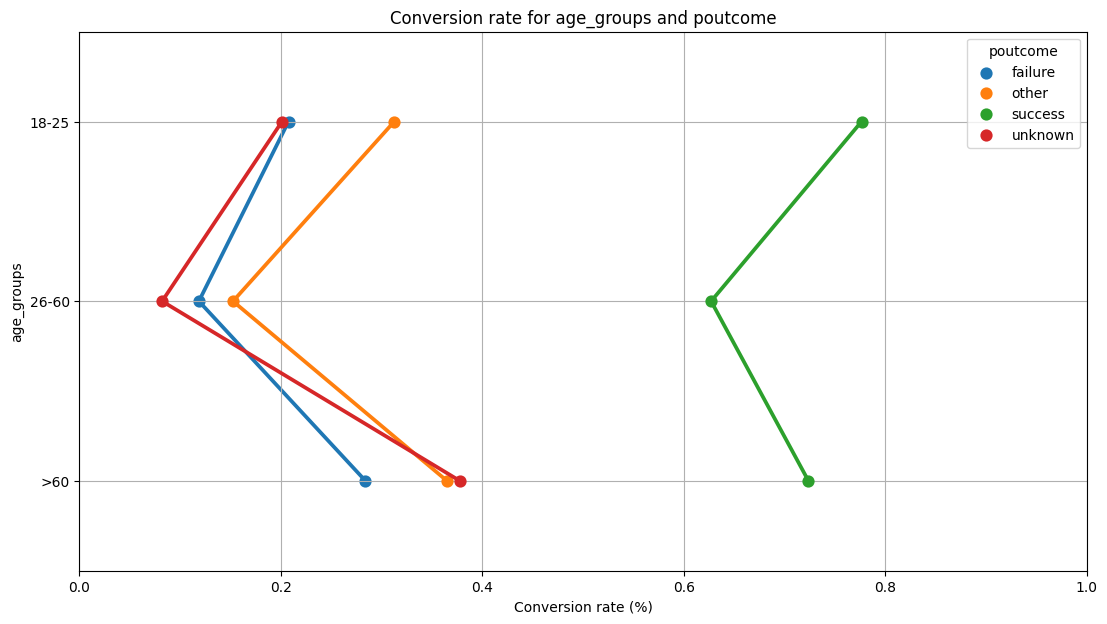

In [70]:
plot_tc_bivariate(['age_groups','poutcome'])

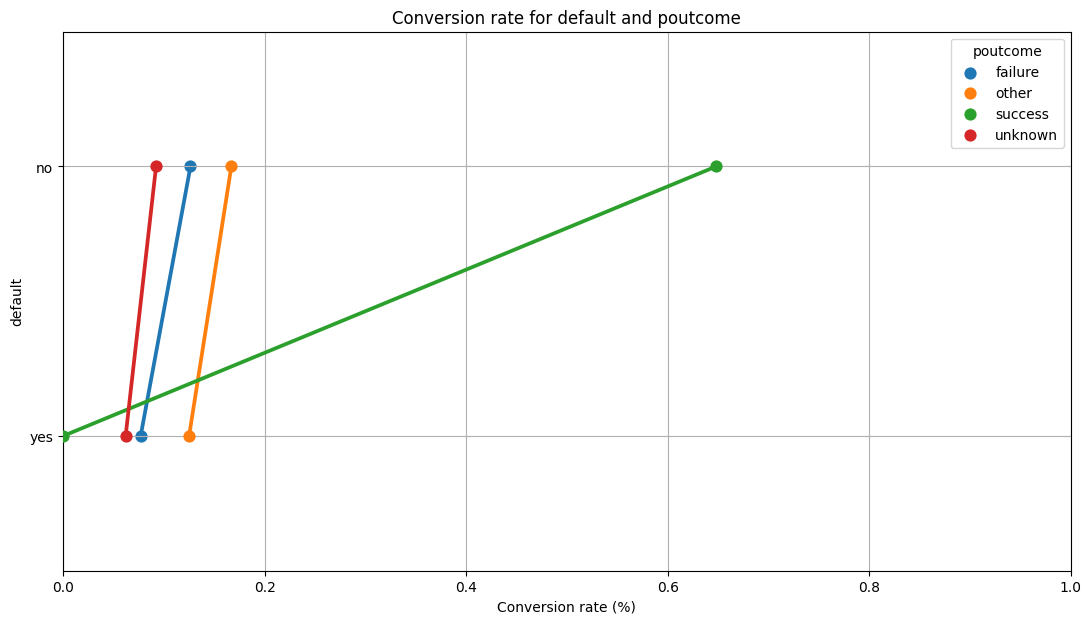

In [71]:
plot_tc_bivariate(['default','poutcome'])

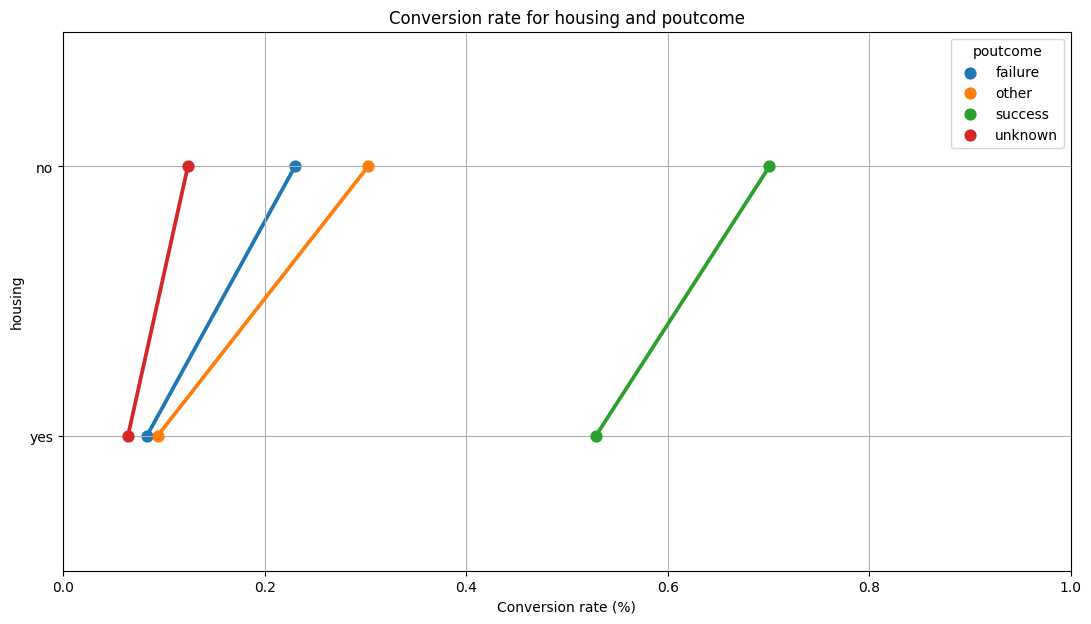

In [72]:
plot_tc_bivariate(['housing','poutcome'])

**CONCLUSIONS**

- The variable "poutcome" followed by the variables "job", "balance_groups", "age_groups", "default" and "housing" have the greatest impact on the conversion rate.

- With this analysis the ideal customer profile would be:
    - Must have been previously contacted by the bank and must have previously purchased such a product
    - Job profile: unemployed, student, retired
    - Bank account balance: between 16K and 20K, and >20K
    - Age: between 18 and 25 years old or >60 years old
    - Not have housing and not in default

-------------